In [1]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data_dir = 'poop_data'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

In [3]:
metadata = pd.read_csv(data_dir + '/metadata.tsv', sep='\t')
metadata.head(5)

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,HEA_lung_disease,HEA_mental_illness,HEA_migraine,HEA_seasonal_allergies,HEA_sibo,HEA_skin_condition,HEA_sleep_duration,HEA_smoking_frequency,HEA_thyroid,HEA_weight_change
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,False,False,False,True,False,False,8 or more hours,Never,False,Decreased more than 10 pounds
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,False,False,False,False,False,True,7-8 hours,Never,False,Remained stable
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,False,False,False,False,False,False,7-8 hours,Not provided,False,Remained stable
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,False,False,True,False,False,True,6-7 hours,Never,True,Decreased more than 10 pounds
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,False,False,False,True,False,True,6-7 hours,Never,False,Remained stable


### Histogram

### 5 diseases & Antibiotic history

In [98]:
HEA_ibd=['HEA_ibd','HEA_antibiotic_history']
ibd=metadata.loc[:, HEA_ibd]
ibd_true=ibd[ibd.HEA_ibd==True]
ibd_true['Catagory']='HEA_ibd'
ibd_true

year=ibd_true[ibd_true['HEA_antibiotic_history']=='Year']

six_months=ibd_true[ibd_true['HEA_antibiotic_history']=='6 months']

Month=ibd_true[ibd_true['HEA_antibiotic_history']=='Month']

Week=ibd_true[ibd_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=ibd_true[ibd_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=ibd_true[ibd_true['HEA_antibiotic_history']=='Not provided']


data1=['HEA_ibd',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data1

['HEA_ibd', 5, 4, 6, 3, 16, 0]

In [99]:
HEA_cdiff=['HEA_cdiff','HEA_antibiotic_history']
cdiff=metadata.loc[:, HEA_cdiff]
cdiff_true=cdiff[cdiff.HEA_cdiff==True]
cdiff_true['Catagory']='HEA_cdiff'

year=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Year']

six_months=cdiff_true[cdiff_true['HEA_antibiotic_history']=='6 months']

Month=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Month']

Week=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=cdiff_true[cdiff_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=cdiff_true[cdiff_true['HEA_antibiotic_history']=='Not provided']


data2=['HEA_cdiff',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data2

['HEA_cdiff', 2, 2, 1, 0, 2, 0]

In [118]:
HEA_sibo=['HEA_sibo','HEA_antibiotic_history']
sibo=metadata.loc[:, HEA_sibo]
sibo_true=sibo[sibo.HEA_sibo==True]
sibo_true['Catagory']='HEA_sibo'

year=sibo_true[sibo_true['HEA_antibiotic_history']=='Year']

six_months=sibo_true[sibo_true['HEA_antibiotic_history']=='6 months']

Month=sibo_true[sibo_true['HEA_antibiotic_history']=='Month']

Week=sibo_true[sibo_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=sibo_true[sibo_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=sibo_true[sibo_true['HEA_antibiotic_history']=='Not provided']


data3=['HEA_sibo',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data3

['HEA_sibo', 0, 5, 3, 3, 16, 0]

In [103]:
HEA_acid_reflux=['HEA_acid_reflux','HEA_antibiotic_history']
acid_reflux=metadata.loc[:, HEA_acid_reflux]
acid_reflux_true=acid_reflux[acid_reflux.HEA_acid_reflux==True]
acid_reflux_true['Catagory']='HEA_acid_reflux'

year=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Year']

six_months=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='6 months']

Month=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Month']

Week=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=acid_reflux_true[acid_reflux_true['HEA_antibiotic_history']=='Not provided']


data4=['HEA_acid_reflux',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data4

['HEA_acid_reflux', 17, 20, 4, 2, 50, 0]

In [105]:
HEA_thyroid=['HEA_thyroid','HEA_antibiotic_history']
thyroid=metadata.loc[:, HEA_thyroid]
thyroid_true=thyroid[thyroid.HEA_thyroid==True]
thyroid_true['Catagory']='HEA_thyroid'

year=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Year']

six_months=thyroid_true[thyroid_true['HEA_antibiotic_history']=='6 months']

Month=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Month']

Week=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Week']

not_taken_in_the_past_year=thyroid_true[thyroid_true['HEA_antibiotic_history']=='I have not taken antibiotics in the past year.']

Not_provided=thyroid_true[thyroid_true['HEA_antibiotic_history']=='Not provided']


data5=['HEA_thyroid',year['Catagory'].count(),six_months['Catagory'].count(),Month['Catagory'].count()
,Week['Catagory'].count(),not_taken_in_the_past_year['Catagory'].count(),Not_provided['Catagory'].count()]
data5

['HEA_thyroid', 9, 9, 1, 1, 33, 0]

In [119]:
data=[data1,data2,data3,data4,data5]
df=pd.DataFrame(data,columns=['Catagory','Year','6 months','Month','Week','I have not taken antibiotics in the past year.','Not provided'])
df

,Catagory,Year,6 months,Month,Week,I have not taken antibiotics in the past year.,Not provided
0,HEA_ibd,5,4,6,3,16,0
1,HEA_cdiff,2,2,1,0,2,0
2,HEA_sibo,0,5,3,3,16,0
3,HEA_acid_reflux,17,20,4,2,50,0
4,HEA_thyroid,9,9,1,1,33,0


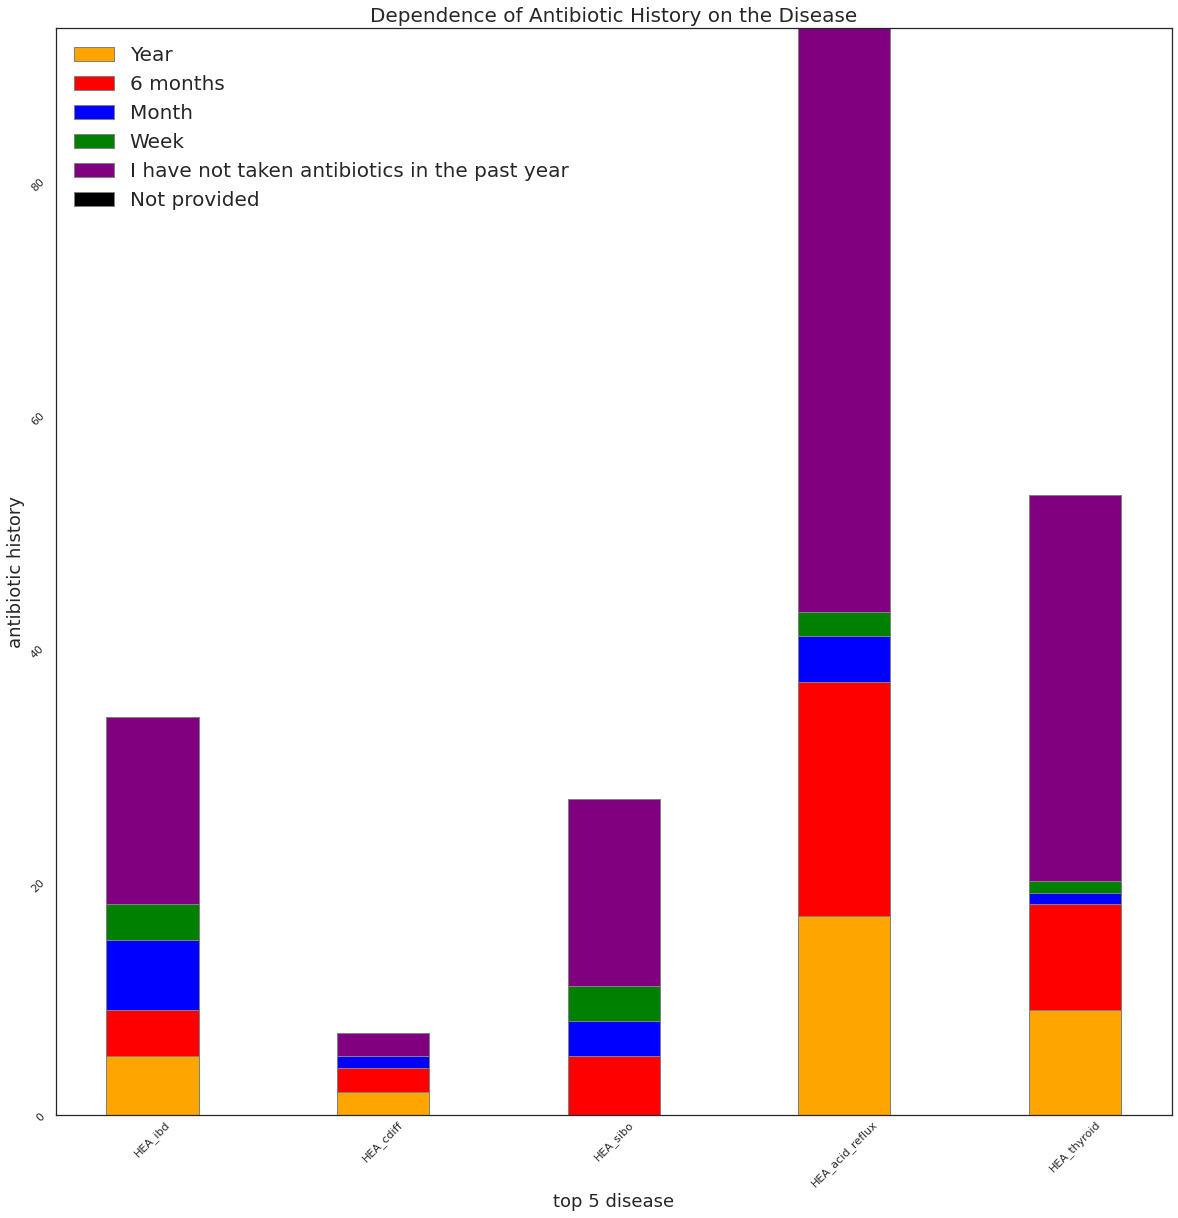

In [168]:
x = df['Catagory']
y1 = df['Year']
y2 = df['6 months']
y3 =df['Month']
y4 =df['Week']
y5 =df['I have not taken antibiotics in the past year.']
y6 =df['Not provided']
plt.figure(figsize=(20, 20))
plt.bar(x,y1,width=0.4,label='Year',color='orange',edgecolor='grey')
plt.bar(x,y2,width=0.4,bottom=y1,label='6 months',color='red',edgecolor='grey')
plt.bar(x,y3,width=0.4,bottom=y1+y2,label='Month',color='blue',edgecolor='grey')
plt.bar(x,y4,width=0.4,bottom=y1+y2+y3,label='Week',color='green',edgecolor='grey')
plt.bar(x,y5,width=0.4,bottom=y1+y2+y3+y4,label='I have not taken antibiotics in the past year',color='purple',edgecolor='grey')
plt.bar(x,y6,width=0.4,bottom=y1+y2+y3+y4+y5,label='Not provided',color='black',edgecolor='grey')


plt.tick_params(axis='x',length=0)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.xlabel('top 5 disease',fontsize=18)
plt.ylabel('antibiotic history',fontsize=18)
plt.title('Dependence of Antibiotic History on the Disease',fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.show()